Load the iris dataset using sklearn

In [2]:
from sklearn import datasets
iris = datasets.load_iris()

iris


{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [3]:
X = iris.data
y = iris.target
print('The shape of X is: ',X.shape)

The shape of X is:  (150, 4)


The dimensionality of each data sample is 4. Next, we aim to use PCA to reduce the dimensionality to 2. We will use the sklearn package. Refer to https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html 

In [4]:
## Reduce the dimensionality of X to 2  [8 points]

from sklearn.decomposition import PCA

### Your code starts here
PCA = PCA(n_components=2)




## Replace X with the 2-d features obtained by PCA
X_2d = PCA.fit_transform(X)




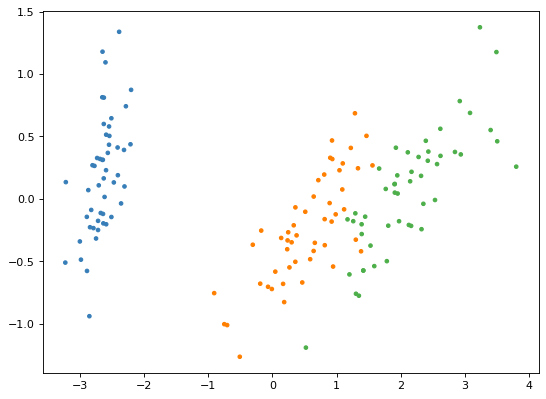

In [5]:
### Visualize X_2d in 2-d space
import numpy as np
import matplotlib.pyplot as plt
colors = np.array([ "#377eb8","#ff7f00","#4daf4a"])
plt.figure(figsize=(8, 6), dpi=80)
plt.scatter(X_2d[:, 0], X_2d[:, 1], s=10, color=colors[y])

## Task 2: K-means and Hierarchical Cluserting [22 Points]

In this task, we will implement and explore two types of clustering methods: K-means and Hierarchical Cluserting. 

Generate two datasets

In [7]:
import time
import warnings

import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.preprocessing import StandardScaler



## Generate datasets


n_samples = 1500
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=0.5, noise=0.05)


# Anisotropicly distributed data
random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)



Text(0.5, 1.0, 'Anisotropicly Distributed Blobs')

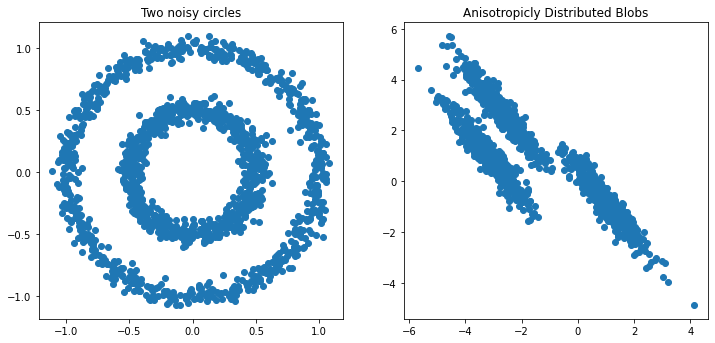

In [8]:
### Visualize the two datasets we generated
plt.figure(figsize=(12, 12))
X_circle, y_circle = noisy_circles
plt.subplot(221)
plt.scatter(X_circle[:, 0], X_circle[:, 1])
plt.title("Two noisy circles")


plt.subplot(222)
X_aniso, y_aniso = aniso
plt.scatter(X_aniso[:, 0], X_aniso[:, 1])
plt.title("Anisotropicly Distributed Blobs")




### Task 2.1: K-means [8 points]

Apply K-means to these two datasets. Set *K=2* for the "two noisy circle" dataset; set *K=3* to the "Anisotropicly Distributed Blobs" dataset. 

Refer to https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

In [11]:
from sklearn.cluster import KMeans


### Your code starts here
# Apply K-means to "two noisy circle" dataset; set K=2
K_Mean = KMeans(n_clusters=2)
y_circle=K_Mean.fit_predict(X_circle)











## Replace y_circle with the clustering assignment obtained from K-means
y_pred_circle = y_circle


# Apply K-means to "Anisotropicly Distributed Blobs" dataset; set K=3

K_Mean = KMeans(n_clusters=3 , init='k-means++')
y_aniso=K_Mean.fit_predict(X_aniso)



## Replace y_aniso with the clustering assignment obtained from K-means
y_pred_aniso = y_aniso



Text(0.5, 1.0, 'Anisotropicly Distributed Blobs')

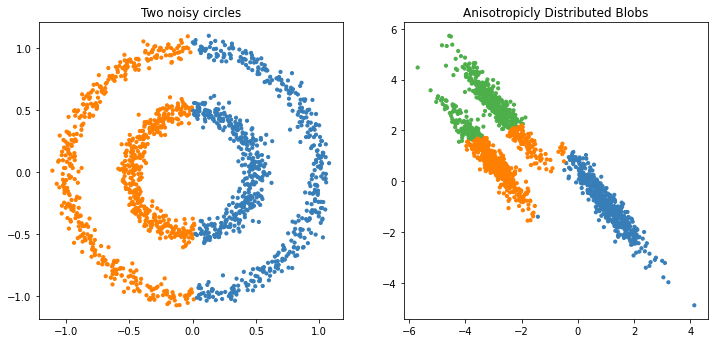

In [12]:
### Visualize K-means clustering results on these two datasets
plt.figure(figsize=(12, 12))
plt.subplot(221)
plt.scatter(X_circle[:, 0], X_circle[:, 1], s=10, color=colors[y_pred_circle])
plt.title("Two noisy circles")


plt.subplot(222)
X_aniso, y_aniso = aniso
plt.scatter(X_aniso[:, 0], X_aniso[:, 1], s=10, color = colors[y_pred_aniso])
plt.title("Anisotropicly Distributed Blobs")

### Task 2.2: Hierarchical Clustering [14 points]

Apply hierarchical clustering to these two datasets. Refer to https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html#sklearn.cluster.AgglomerativeClustering






As we discussed in the class, agglomerative hierarchical clustering methods hierarchical merge clusters and end with a single big cluster consisting of all samples. We can then freely choose the number of clusters K and split the single big cluster into K clusters by checking the merging process. In this subtask, we will **set K=2 for the "two noisy circles" dataset; set K=3 for the "Anisotropicly Distributed Blobs" dataset**. We will adopt MIN and MAX as proximity measures as follows.


(1) Use MIN as the proximity measure. Note that MIN is also called single-linkage.

(2) Use MAX as the proximity measure. Note that MAX is also called complete-linkage.


In [13]:
### Use MIN as proximity measure [7 points]

from sklearn.cluster import AgglomerativeClustering



### Your code starts here

# Apply Agglomerative Clustering with MIN to "two noisy circle" dataset; set K=2

AC = AgglomerativeClustering(n_clusters=2,linkage='single', distance_threshold=None)
AC.fit(X,y)
## Replace y_circle with the clustering assignment obtained from K-means
y_pred_circle = AC.fit_predict(X_circle,y_circle)

# Apply Agglomerative Clustering with MIN to "Anisotropicly Distributed Blobs" dataset; set K=3
AC = AgglomerativeClustering(n_clusters=3,linkage='single', distance_threshold=None)
AC.fit(X,y)

## Replace y_aniso with the clustering assignment obtained from K-means
y_pred_aniso = AC.fit_predict(X_aniso,y_aniso)

Text(0.5, 1.0, 'Anisotropicly Distributed Blobs')

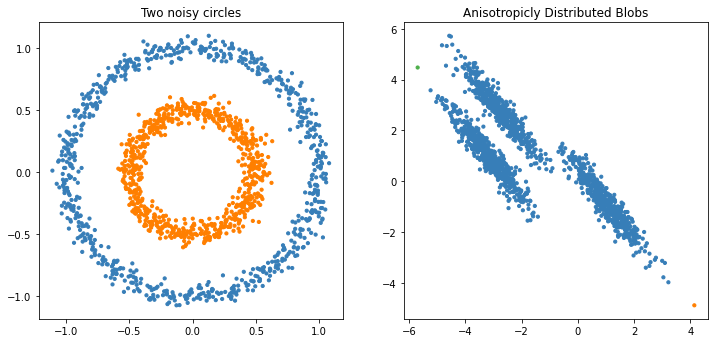

In [14]:
### Visualize Agglomerative Clustering with MIN results on these two datasets
plt.figure(figsize=(12, 12))
plt.subplot(221)
plt.scatter(X_circle[:, 0], X_circle[:, 1], s=10, color=colors[y_pred_circle])
plt.title("Two noisy circles")


plt.subplot(222)
X_aniso, y_aniso = aniso
plt.scatter(X_aniso[:, 0], X_aniso[:, 1], s=10, color = colors[y_pred_aniso])
plt.title("Anisotropicly Distributed Blobs")

In [18]:
### Use MAX as proximity measure [7 points]

from sklearn.cluster import AgglomerativeClustering




### Your code starts here

# Apply Agglomerative Clustering with MAX to "two noisy circle" dataset; set K=2

y_circle=AgglomerativeClustering(n_clusters=2,linkage='complete').fit_predict(X_circle)


## Replace y_circle with the clustering assignment obtained from K-means
y_pred_circle = y_circle

# Apply Agglomerative Clustering with MIN to "Anisotropicly Distributed Blobs" dataset; set K=3

y_aniso=AgglomerativeClustering(n_clusters=3,linkage='complete').fit_predict(X_aniso)



## Replace y_aniso with the clustering assignment obtained from K-means
y_pred_aniso = y_aniso

Text(0.5, 1.0, 'Anisotropicly Distributed Blobs')

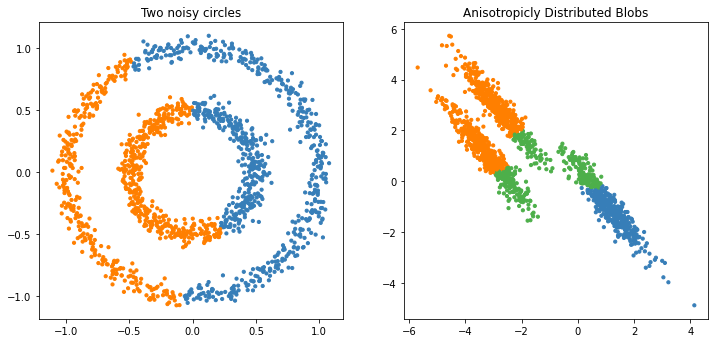

In [19]:
### Visualize Agglomerative Clustering with MAX results on these two datasets
plt.figure(figsize=(12, 12))
plt.subplot(221)
plt.scatter(X_circle[:, 0], X_circle[:, 1], s=10, color=colors[y_pred_circle])
plt.title("Two noisy circles")


plt.subplot(222)
X_aniso, y_aniso = aniso
plt.scatter(X_aniso[:, 0], X_aniso[:, 1], s=10, color = colors[y_pred_aniso])
plt.title("Anisotropicly Distributed Blobs")